In [57]:
import pandas as pd
from sklearn.utils import shuffle
df=pd.read_csv('./../testdata/test.csv')
#df = pd.read_csv('C:/Users/tasr8001/Development/workspace/ai_ml_workshop/tmp/PS_20174392719_1491204439457_log.csv ')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [58]:
# bin amounts into 50K range
bins = range(0, 1000000, 50000)
labels = range(0, 950000, 50000)
df['binned'] = pd.cut(df['amount'], bins=bins, labels=labels)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,binned
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


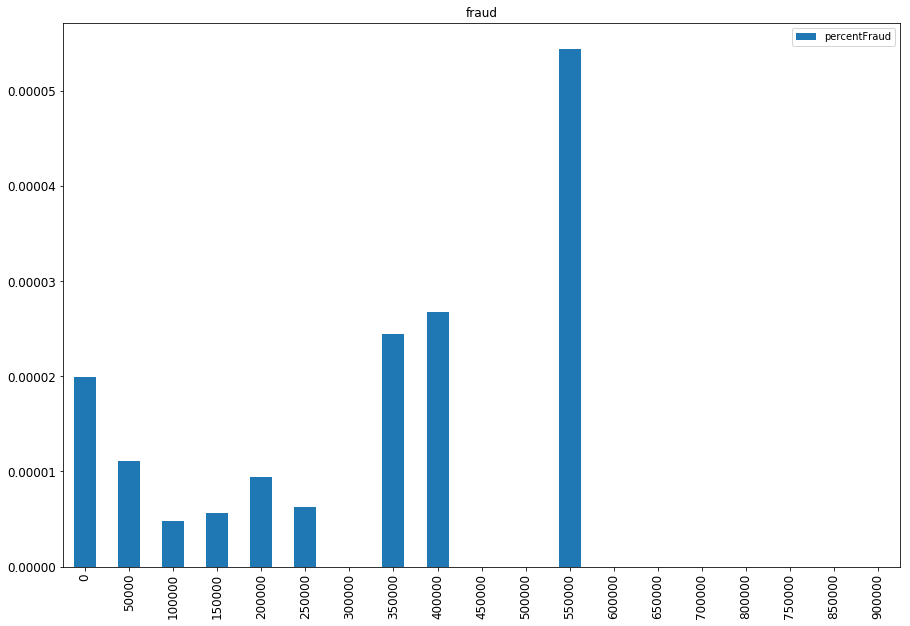

In [59]:
# analysis: set what percentage of tx in each bin is fraudulent

#df[['amount']].plot(kind='hist',bins=bins,rwidth=0.8)
adf1 = df['binned'].value_counts().to_frame('totalTx')
adf1['bin'] = adf1.index

fraud = df.loc[df['isFraud'] == 0].groupby(['binned']).size().to_frame('nonfraud')
adf1 = adf1.join(fraud, lsuffix='', rsuffix='', sort=False)
adf1['percentFraud'] = (adf1['totalTx'] - adf1['nonfraud'])/df1['totalTx']

adf1[['bin','percentFraud']].plot(kind='bar', title ="fraud", figsize=(15, 10), legend=True, fontsize=12)



In [60]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df = pd.get_dummies(df)

df = shuffle(df)

df.to_csv('./../testdata/test_out.csv')
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,...,binned_450000,binned_500000,binned_550000,binned_600000,binned_650000,binned_700000,binned_750000,binned_800000,binned_850000,binned_900000
47237,9,150583.04,59516.00,0.00,16220.00,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5072,5,131815.57,1135018.52,1266834.10,2182677.05,2050861.47,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21568,8,4324.03,528067.95,523743.92,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2104,1,3870.28,317403.38,313533.10,6519.30,10389.58,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14224,8,4376.88,853.00,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
